In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
from google.colab import files

In [ ]:
upload=files.upload()

Saving Sample - Superstore.csv to Sample - Superstore (1).csv


In [ ]:

Superstore_data=pd.read_csv('Sample - Superstore.csv',encoding='latin-1')

print(Superstore_data.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  11-08-2016  11-11-2016    Second Class    CG-12520   
1       2  CA-2016-152156  11-08-2016  11-11-2016    Second Class    CG-12520   
2       3  CA-2016-138688  06-12-2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10-11-2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10-11-2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [ ]:
print(Superstore_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
print(Superstore_data.describe())

            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


In [ ]:
Superstore_data.duplicated().sum()

np.int64(0)

In [ ]:
Superstore_data['Order Date']=pd.to_datetime(Superstore_data['Order Date'], format='mixed')
Superstore_data['Ship Date']=pd.to_datetime(Superstore_data['Ship Date'], format='mixed')

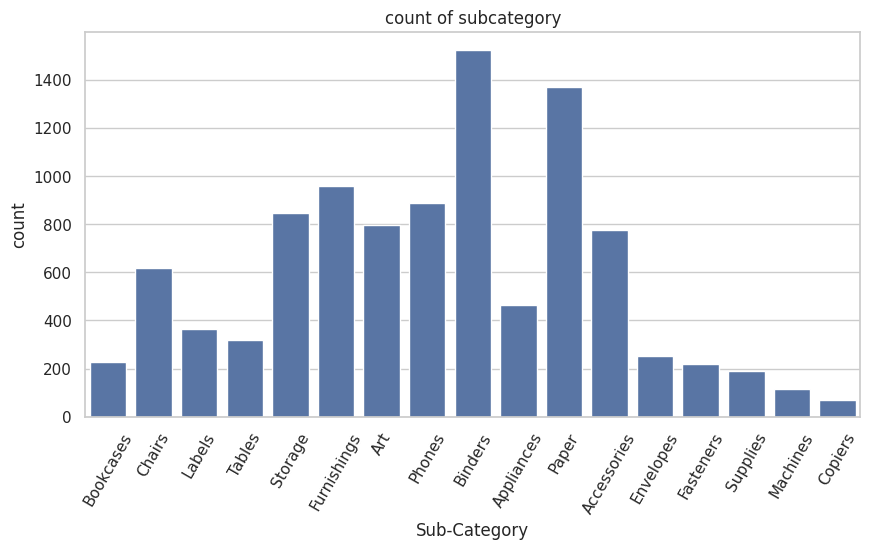

In [ ]:
sns.countplot(x='Sub-Category',data=Superstore_data)
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(rotation=60)
plt.title('count of subcategory')
plt.show()

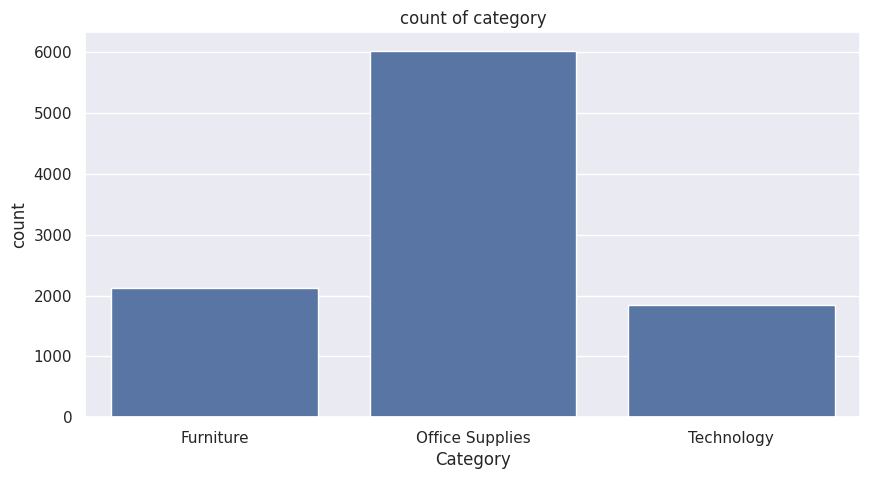

In [ ]:
sns.countplot(x="Category",data=Superstore_data)
plt.title('count of category')
plt.show()

In [ ]:
df2=pd.DataFrame(Superstore_data.groupby('Segment')['Profit'].mean())

In [ ]:
df2


,Profit
Segment,
Consumer,25.836873
Corporate,30.456667
Home Office,33.818664


/tmp/ipython-input-3275177936.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2,x=df2.index,y=df2.Profit,palette='pastel')


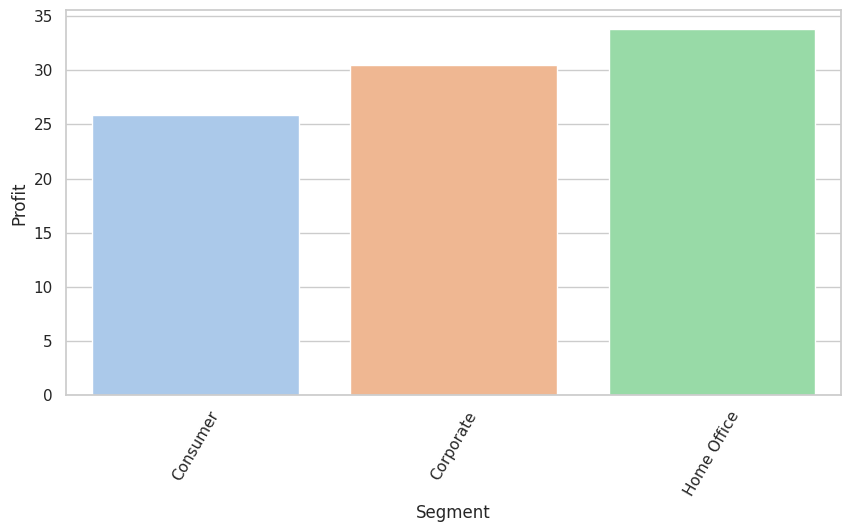

In [ ]:
sns.set_theme(style="whitegrid")
sns.barplot(data=df2,x=df2.index,y=df2.Profit,palette='pastel')
plt.xticks(rotation=60)
plt.show()


In [ ]:
df_stackb=Superstore_data[['Ship Mode','Sales','Profit']]
df_stackb=df_stackb.groupby(['Ship Mode']).sum().reset_index()

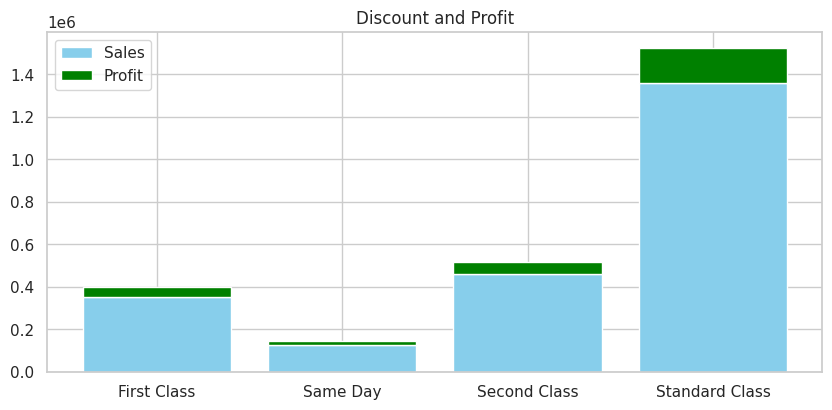

In [ ]:
plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
plt.bar(x=df_stackb['Ship Mode'],height=df_stackb['Sales'],color='skyblue')
plt.bar(x=df_stackb['Ship Mode'],height=df_stackb['Profit'],bottom=df_stackb['Sales'],color='green')
plt.title('Discount and Profit')
plt.legend(['Sales','Profit'])

In [ ]:
region_analysis=pd.DataFrame(Superstore_data.groupby('Region')['Profit'].sum())

In [ ]:
region_analysis

,Profit
Region,
Central,39706.3625
East,91522.7800
South,46749.4303
West,108418.4489


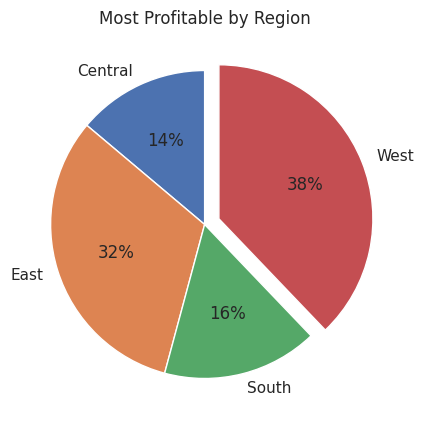

In [ ]:
plt.pie(region_analysis.Profit,
        labels = region_analysis.index,
        startangle = 90, autopct = "%1.0f%%",
        explode = [0, 0, 0, 0.1])

plt.title("Most Profitable by Region")
plt.show()